<a href="https://colab.research.google.com/github/alagarde-bit/Data-Mining-and-Machine-Learning/blob/main/hw04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 [Feature Selection Tutorial](https://www.thepythoncode.com/article/feature-selection-and-feature-engineering-using-python)
## Alex Lagarde
### 4/23/21

## 3. Tutorial
### a. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier

### b. Read in CSV 

In [ ]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
print(df.shape)
df.head(5)

(270, 14)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


### c. Store label into separate variable and drop it from original dataframe.

In [ ]:
label = df["Heart Disease"]
df.drop("Heart Disease", axis=1, inplace=True)

### d. Checking to see if there is an imbalance for our class label variable by printing value counts.

Absence     150
Presence    120
Name: Heart Disease, dtype: int64


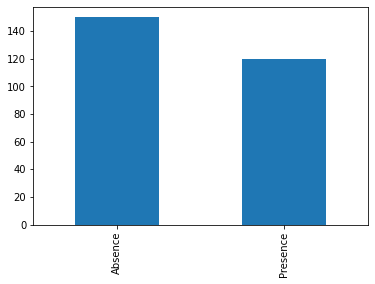

In [ ]:
print(label.value_counts())
label.value_counts().plot(kind="bar")

### e. Casting integers to true categorical type 

In [ ]:
categorical_features = ["Sex", "Chest pain type", "FBS over 120", "EKG results", "Exercise angina", "Slope of ST", "Number of vessels fluro", "Thallium"]
df[categorical_features] = df[categorical_features].astype("category")

### f. Min-Max scaling the continuous features

In [ ]:
continuous_features = set(df.columns) - set(categorical_features)
scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[list(continuous_features)] = scaler.fit_transform(df[list(continuous_features)])
df_norm

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,0.854167,1,4,0.339623,0.447489,0,2,0.290076,0,0.387097,2,3,3
1,0.791667,0,3,0.198113,1.000000,0,2,0.679389,0,0.258065,2,0,7
2,0.583333,1,2,0.283019,0.308219,0,0,0.534351,0,0.048387,1,0,7
3,0.729167,1,4,0.320755,0.312785,0,0,0.259542,1,0.032258,2,1,7
4,0.937500,0,2,0.245283,0.326484,0,2,0.381679,1,0.032258,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,1,3,0.735849,0.166667,1,0,0.694656,0,0.080645,1,0,7
266,0.312500,1,2,0.245283,0.312785,0,0,0.778626,0,0.000000,1,0,7
267,0.562500,0,2,0.433962,0.383562,0,2,0.625954,0,0.209677,2,0,3
268,0.583333,1,4,0.433962,0.150685,0,0,0.587786,0,0.064516,2,0,6


### g. Using chi-square feature selection with SelectKBest and chi2 from sklearn.feature_selection module to select K highest chi-square values between independent feature and dependent. The higher chi-square value indicates that the two variables deviate more from each other. Here I look at 5 highest features with chi-square and transform the normalized X features and label.

In [ ]:
X_new = SelectKBest(k=5, score_func=chi2).fit_transform(df_norm, label)
X_new

array([[4.        , 0.        , 0.38709677, 3.        , 3.        ],
       [3.        , 0.        , 0.25806452, 0.        , 7.        ],
       [2.        , 0.        , 0.0483871 , 0.        , 7.        ],
       ...,
       [2.        , 0.        , 0.20967742, 0.        , 3.        ],
       [4.        , 0.        , 0.06451613, 0.        , 6.        ],
       [4.        , 1.        , 0.24193548, 3.        , 3.        ]])

### h. Recursive Feature Elimination by recursively considering smaller sets of features. Importing the rfe class from sklearn.feature_selection, which takes in a machine learning model to iterate through to find the 5 most appropriate features. Transform the normalized X features and label and print results.

In [ ]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
X_new = rfe.fit_transform(df_norm, label)
X_new

array([[4.        , 0.44748858, 0.29007634, 0.38709677, 3.        ],
       [3.        , 1.        , 0.67938931, 0.25806452, 7.        ],
       [2.        , 0.30821918, 0.53435115, 0.0483871 , 7.        ],
       ...,
       [2.        , 0.38356164, 0.6259542 , 0.20967742, 3.        ],
       [4.        , 0.15068493, 0.58778626, 0.06451613, 6.        ],
       [4.        , 0.3652968 , 0.28244275, 0.24193548, 3.        ]])

### i. RandomForestClassifier feature importance graph based on the amount of decrease in impurity a feature causes.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

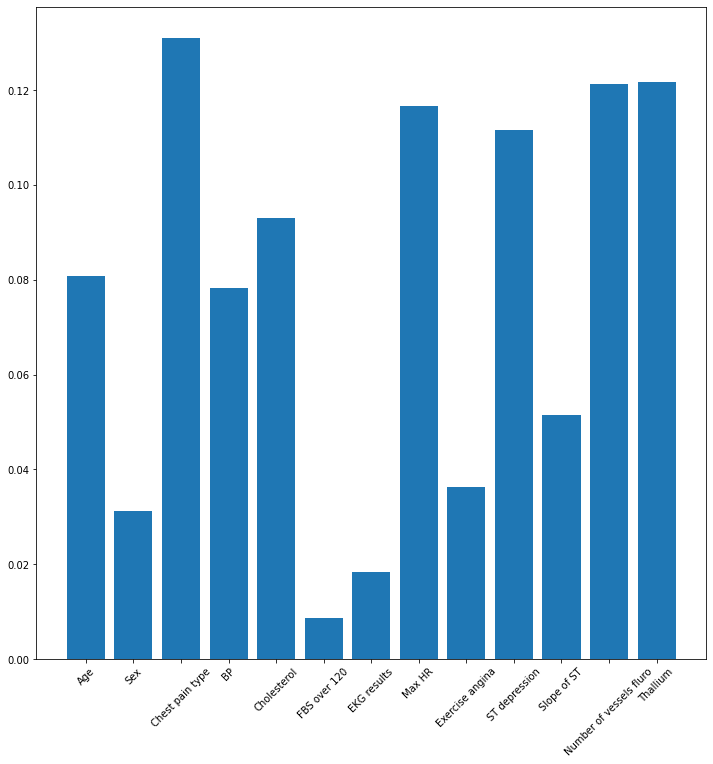

In [ ]:
clf = RandomForestClassifier()
clf.fit(df_norm, label)
plt.figure(figsize=(12,12))
plt.bar(df_norm.columns, clf.feature_importances_)
plt.xticks(rotation=45)

## 4. Challenge selecting features based absolute value correlation
## Building correlation matrix to show correlation coefficients for all variables. Helps to check for multicollinearity and strength of correlation to response variable. Copying original dataframe to new dataframe and cleaning it by setting categorical variables and one hot encoding. 

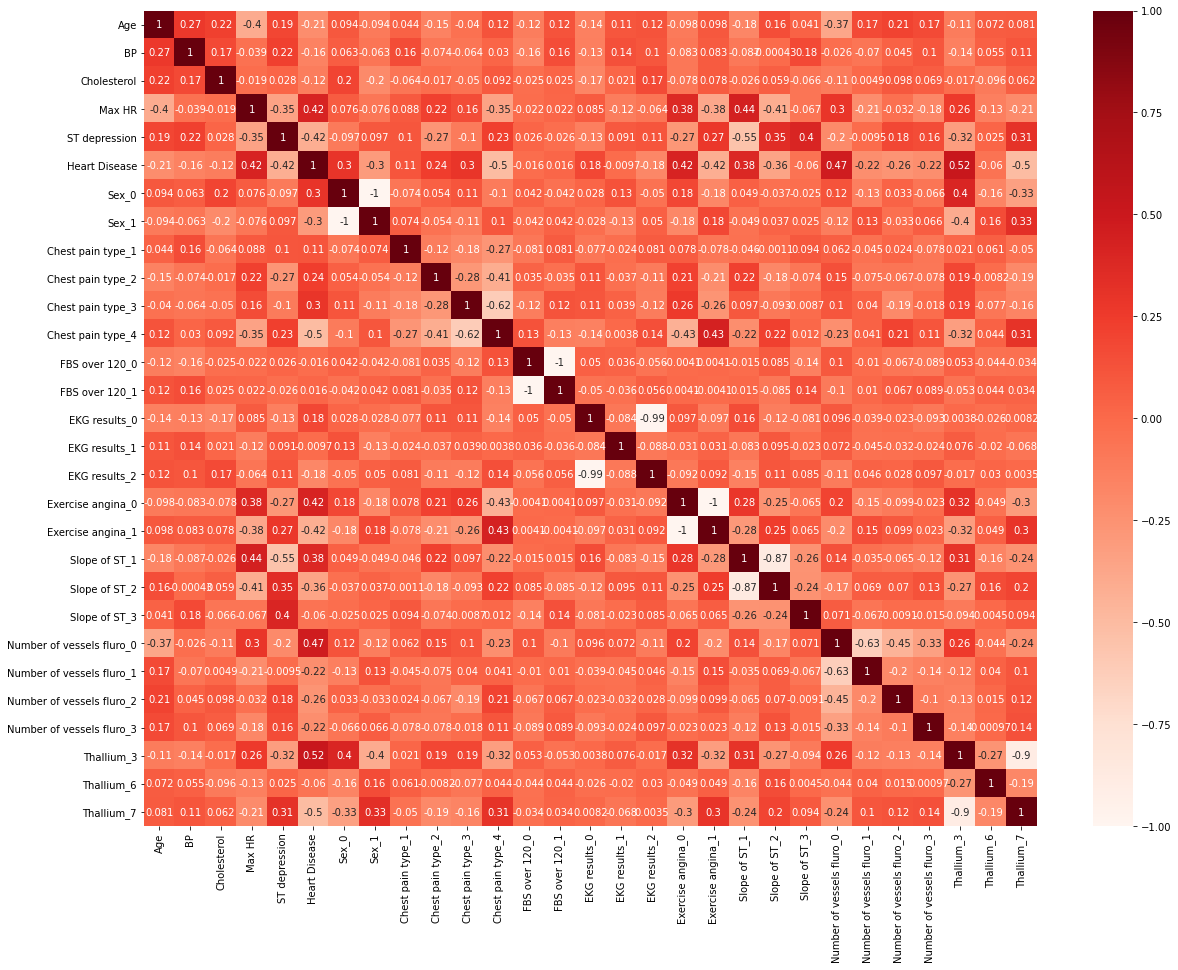

In [ ]:
import seaborn as sns
df2 = pd.read_csv('Heart_Disease_Prediction.csv')
df2['Heart Disease']= pd.get_dummies(df2['Heart Disease'])
df2[categorical_features] = df[categorical_features].astype("category")
df2 = pd.get_dummies(df2)
df2[list(continuous_features)] = scaler.fit_transform(df2[list(continuous_features)])
plt.figure(figsize=(20,15))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Taking absolute values of correlations to Heart Disease. Then, arbitrarily select a cutoff correlation coefficient to select features.

In [ ]:
cor_target = abs(cor['Heart Disease'])
features = cor_target[cor_target>0.3]
features